## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [14]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import numpy as np
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [15]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

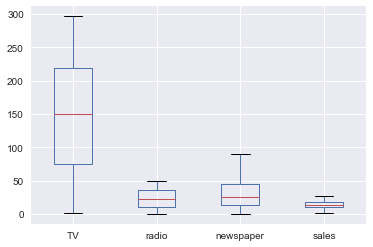

In [76]:
df.boxplot()
plt.show()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

/Users/pdhe/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


<function matplotlib.pyplot.show>

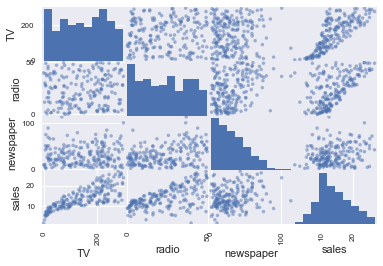

In [77]:
#plt.scatter(df[['TV']],df[['sales']],df[['radio']],df[['sales']],df[['newspaper']],df[['sales']])
#plt.scatter([df[['TV']],df[['radio']],df[['newspaper']],df[['sales']]],[df[['TV']],df[['radio']],df[['newspaper']],df[['sales']]])
#plt.scatter(df,df)

scatter_matrix(df)
#pd.plotting.scatter_matrix

plt.show

In [18]:
from pandas.tools.plotting import scatter_matrix 

Which of the variables seem correlated with one another? Which don't? Explain your answer

Based on the plot, TV and radio correlated to the sales. The newspaper seems not to effect the sales that much.


In [78]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [19]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [20]:
# Code here
y=df[['sales']]



b) Set X to be just the features described above in df

In [21]:
# Code here
X=df[['TV','newspaper','radio']]

df.shape

(200, 4)

c) Randomly split data into training and testing - 80% training, 20% testing.

In [80]:
# Code here
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=43)

#Xtrain=X[:int(0.8*len(X))]
#ytrain=y[:int(0.8*len(X))]

#Xtest=X[int(0.8*len(X)):]
#ytest=y[int(0.8*len(X)):]





d) Train model on training data, and make predictions on testing data

In [81]:
# Code here
lam=0.000001


def step_gradient(b_current,m_current,Xtrain,ytrain,lam):
#lam is the learning rate
    b_gradient=0
    length=len(ytrain)
    shape=Xtrain.shape
    m_gradient=np.zeros((1,shape[1]))
    N=float(len(ytrain))
    Xtrain=Xtrain.as_matrix()
    ytrain=ytrain.as_matrix()

    for i in range(0,length):
        x=Xtrain[i,:]
        y=ytrain[i,0]
        b_gradient += -(2/N)*(y-(np.dot(m_current,x.T)+b_current))
        m_gradient += -(2/N)*x*(y-(np.dot(m_current,x.T)+b_current))
        
    new_b=b_current-(lam*b_gradient)
    new_m=m_current-(lam*m_gradient)
        
    
    return [new_b,new_m]

num_interations=1000
b=0
m=np.zeros((1,3))
for i in range(num_interations):
    [b,m]=step_gradient(b,m,Xtrain,ytrain,lam)
        

m




array([[ 0.06141866,  0.05732077,  0.10404407]])

In [85]:
akak=m*Xtest
ypredict=akak['TV']+akak['newspaper']+akak['radio']+b
ypredict,ytest

(57      5.747646
 38     12.349882
 68     10.651502
 80      9.252386
 81      8.751187
 189    19.226609
 184    26.256106
 11      6.052964
 129    18.814689
 63     17.877598
 66      5.259658
 18     24.604428
 134    19.573037
 196     3.524754
 147    16.007405
 39      7.439652
 174    11.817893
 150     6.613131
 94     23.354415
 30      8.342122
 1      22.034470
 3       9.806925
 123    14.904262
 181    10.367011
 96     16.352301
 122     6.303966
 186    18.409272
 40     19.762753
 67      4.622849
 20     12.631021
 12     15.915499
 46     14.903576
 42     16.567061
 93     20.240817
 169    18.989268
 2       9.409801
 58     11.316965
 190     3.751340
 152    11.099722
 168    14.357003
 dtype: float64,      sales
 57     5.5
 38    14.7
 68    13.4
 80    11.0
 81    11.8
 189   15.9
 184   26.2
 11     8.6
 129   24.7
 63    15.7
 66     9.3
 18    24.4
 134   19.6
 196    7.6
 147   13.2
 39    10.1
 174   11.7
 150   10.1
 94    22.2
 30    10.5
 1     22.1


In [117]:
yt-mean(yt)

array([[ -8.795],
       [  0.405],
       [ -0.895],
       [ -3.295],
       [ -2.495],
       [  1.605],
       [ 11.905],
       [ -5.695],
       [ 10.405],
       [  1.405],
       [ -4.995],
       [ 10.105],
       [  5.305],
       [ -6.695],
       [ -1.095],
       [ -4.195],
       [ -2.595],
       [ -4.195],
       [  7.905],
       [ -3.795],
       [  7.805],
       [ -4.995],
       [ -2.695],
       [ -3.795],
       [  2.605],
       [ -7.295],
       [  8.305],
       [  7.205],
       [ -4.795],
       [  0.305],
       [  3.105],
       [  0.605],
       [  2.805],
       [  5.105],
       [  2.805],
       [ -3.895],
       [ -1.095],
       [ -7.595],
       [ -2.695],
       [ -2.095]])

e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [118]:
# Code here

#Xtrain=Xtrain.as_matrix()
#ytrain=ytrain.as_matrix()
yt=ytest.as_matrix()
yp=ypredict.as_matrix()
diff=np.zeros_like(yt)
for i in range(len(yt)):
    diff[i]=yp[i]-yt[i]
    
R2=1-(np.mean((diff) ** 2))/(np.mean((yt-mean(yt))**2))




print('R^2 Score is: %3.f'% R2)

R^2 Score is:   1


R^2 is close to 100% means all the data fits the prediction.

# f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

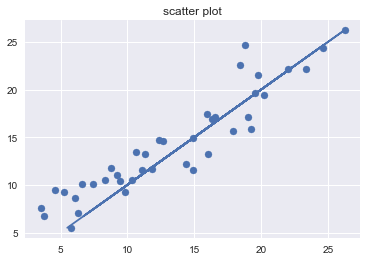

In [121]:
# Code here

plt.title('scatter plot')
plt.scatter(ypredict,ytest)
plt.plot(ytest,ytest)



g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [122]:
# Code/explanation here
reg=LinearRegression()
reg.fit(Xtrain,ytrain)
print('Coefficients: \n', reg.coef_)


Coefficients: 
 [[ 0.04536767 -0.00052201  0.18669444]]


In [126]:
print("Residual sum of squares: %.2f" %np.mean((reg.predict(Xtrain) - ytrain) ** 2))


Residual sum of squares: 2.97


In [133]:

print('Variance score is: %.f' % reg.score(Xtrain, ytrain))
reg.coef_


Variance score is: 1


array([[ 0.04536767, -0.00052201,  0.18669444]])

The coefficient of the different data type should be checked. Form the coefficient number, the radio has the highest value of coefiicient which is 0.186 followed by TV then the newspaper. 

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

Normalization of the data is very importent to think even before we have any model to make sure all the data type are in the same scale.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

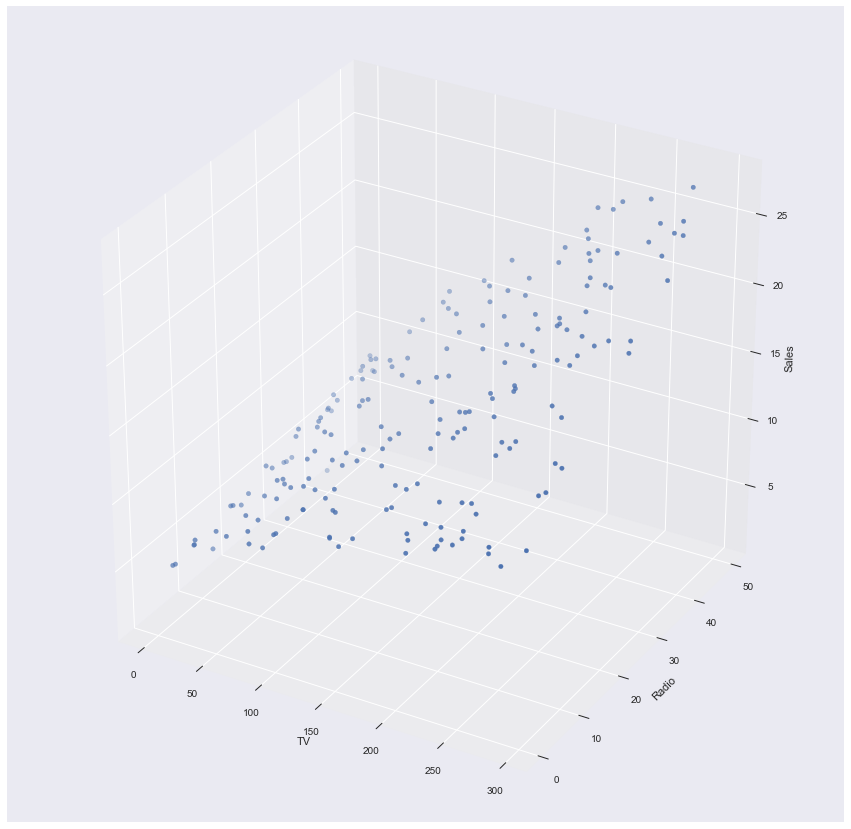

In [75]:
# Type your answer here. 
from mpl_toolkits.mplot3d import Axes3D
figu=plt.figure(figsize=(15,15))
axe=figu.add_subplot(1,1,1, projection='3d')
axe.scatter(X['TV'],X['radio'],y)

axe.set_xlabel('TV')
axe.set_ylabel('Radio')
axe.set_zlabel('Sales')


## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809


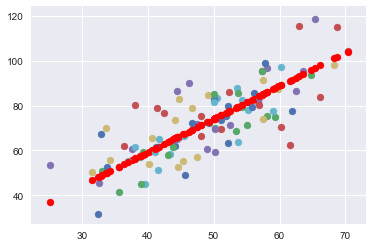

In [59]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    points = genfromtxt("../data/data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

def run2(num_iterations,learning_rate):
    points = genfromtxt("../data/data.csv", delimiter=",")

    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')


Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


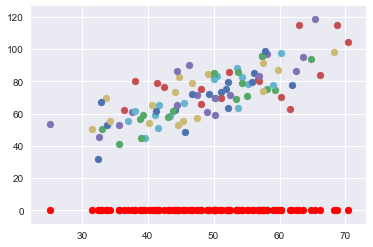

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


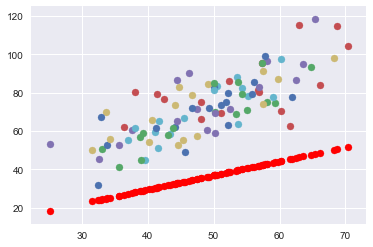

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


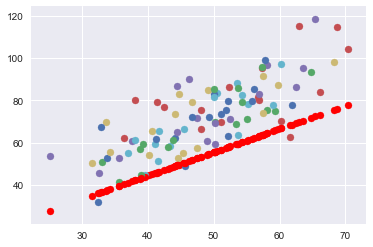

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


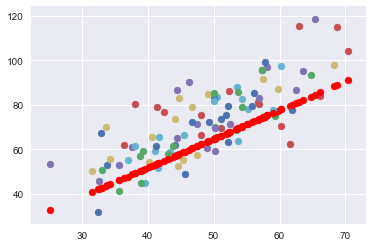

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


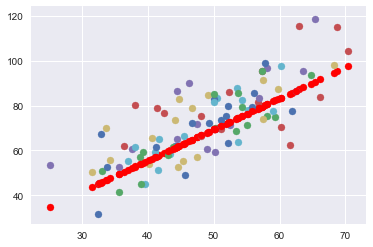

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


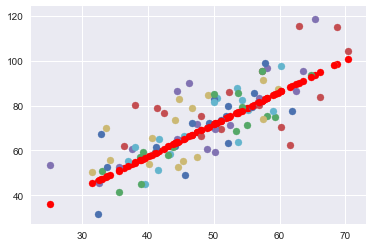

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


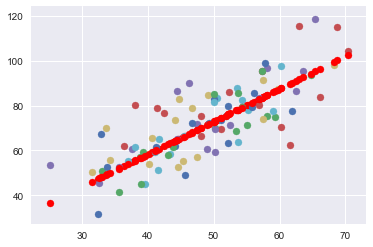

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


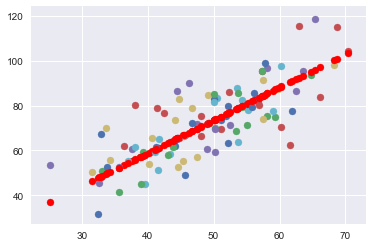

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


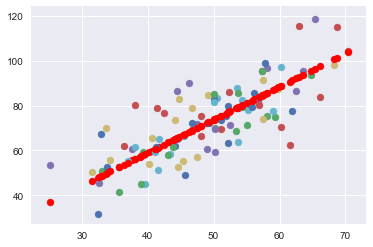

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


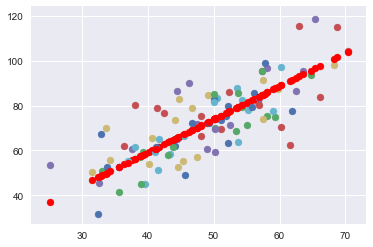

In [31]:
# Use this to visually discuss convergence rate based on learning rate

for num in range(0,10):
    run(num)
    plt.show()


Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


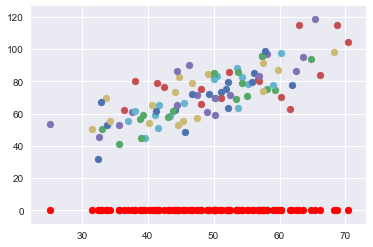

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 1.4547010110737295e-17, m = 7.370702973591052e-16, error = 5565.1078344832085


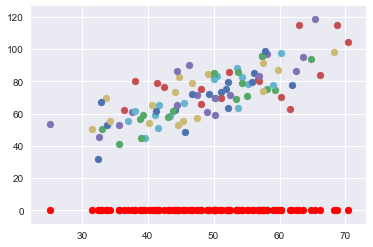

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 2.9094020221474584e-17, m = 1.4741405947182102e-15, error = 5565.107834483203


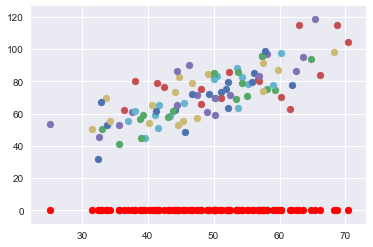

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 4.3641030332211864e-17, m = 2.211210892077315e-15, error = 5565.107834483198


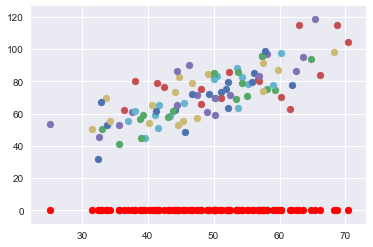

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 5.818804044294913e-17, m = 2.9482811894364197e-15, error = 5565.107834483193


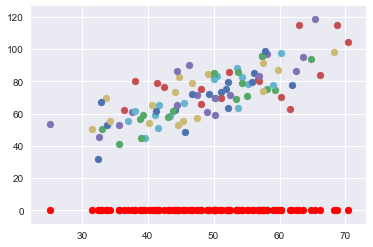

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 7.27350505536864e-17, m = 3.6853514867955235e-15, error = 5565.107834483188


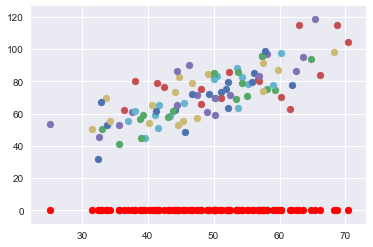

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 8.728206066442365e-17, m = 4.422421784154628e-15, error = 5565.107834483181


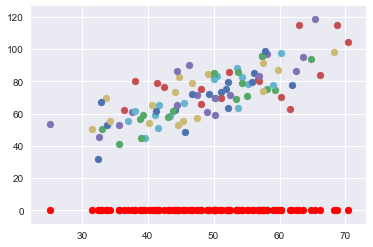

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 1.018290707751609e-16, m = 5.159492081513731e-15, error = 5565.107834483176


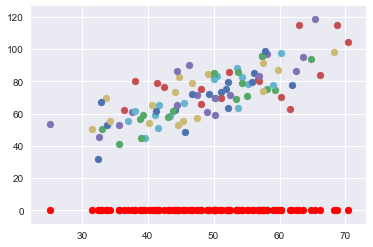

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 1.1637608088589814e-16, m = 5.896562378872834e-15, error = 5565.107834483172


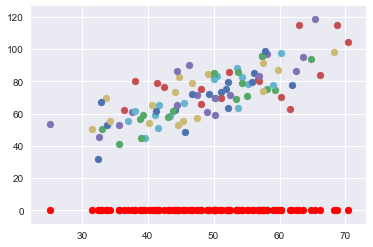

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 1.3092309099663538e-16, m = 6.6336326762319365e-15, error = 5565.107834483166


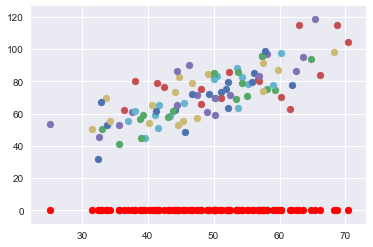

In [60]:
# A sample of too small learning rate:
for num in range(0,10):
    run2(num,1e-19)
    plt.show()
    
# this learning rate shows a barly converge of the regression.


Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


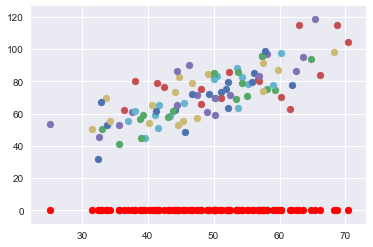

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 14547.010110737296, m = 737070.2973591052, error = 1354315675610631.0


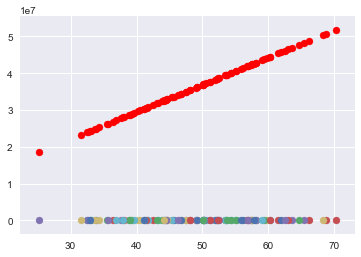

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = -7220028167.85796, m = -367343666226.1004, error = 3.363934631241988e+26


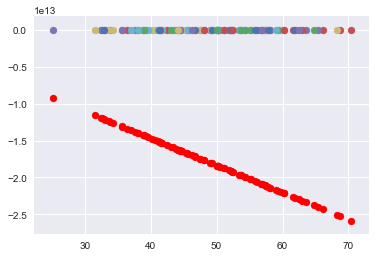

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 3598344114587654.0, m = 1.8307809190267066e+17, error = 8.355552850090712e+37


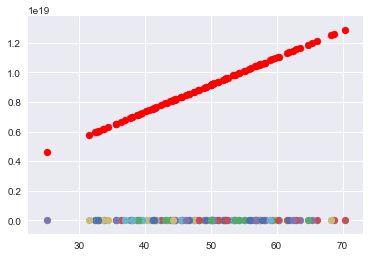

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = -1.7933560179791422e+21, m = -9.124313501395666e+22, error = 2.0754048780336344e+49


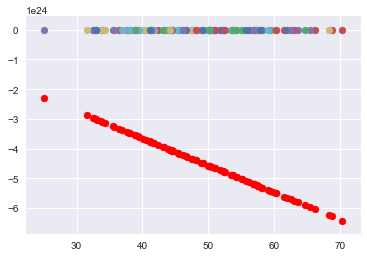

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 8.937793898548683e+26, m = 4.54740903220746e+28, error = 5.1550214390889085e+60


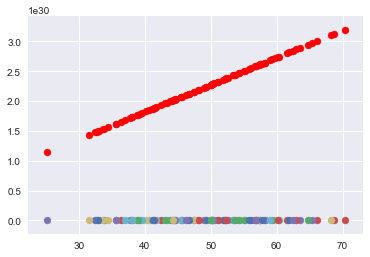

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = -4.454450704269652e+32, m = -2.2663544937423427e+34, error = 1.2804367147216291e+72


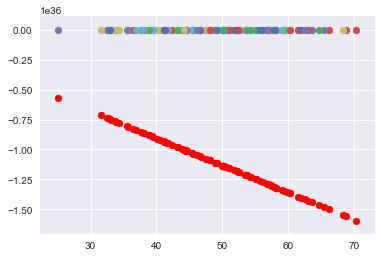

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 2.2200255792416923e+38, m = 1.1295141156045848e+40, error = 3.180429411942241e+83


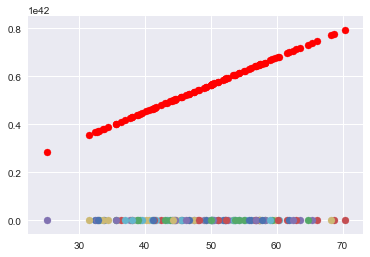

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = -1.1064245402386786e+44, m = -5.629314129244296e+45, error = 7.89975102092127e+94


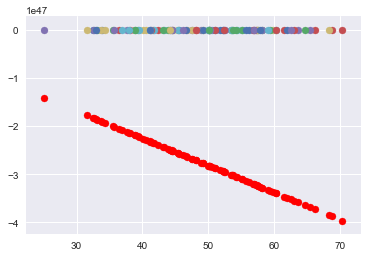

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 5.514239451513535e+49, m = 2.8055583483122303e+51, error = 1.9621899469995245e+106


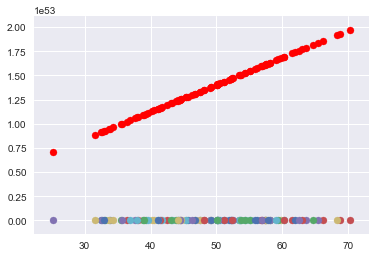

In [61]:
# A sample of too large learning rate:
for num in range(0,10):
    run2(num,100)
    plt.show()
    
# For a large learning rate like below, the model just bumping around the optimal point because each step is too large
# to be precise

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

In [62]:
def newrun(num_iterations,learning_rate):
    points = genfromtxt("../data/data.csv", delimiter=",")
    #learning_rate = 0.0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    #num_iterations = num_iterations
    #print ("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    #print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    #print ("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    #for i in range(0,len(points)):
     #   plt.scatter(points[i,0],points[i,1])
      #  plt.scatter(points[i,0],m*points[i,0]+b,color='r')
    error=compute_error_for_line_given_points(b, m, points)
    
    return error

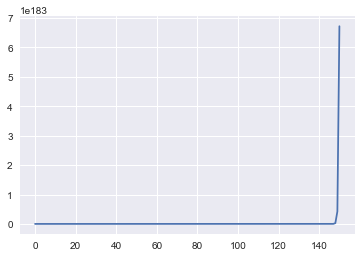

In [68]:
iteration=np.linspace(0,150,151)

errors1=[]
errors2=[]
errors3=[]
errors4=[]

learning_rate=[0.001,0.0001,0.00001,0.000001]
for i in range(len(iteration)):
    errors1.append(newrun(int(iteration[i]),learning_rate[0]))
    errors2.append(newrun(int(iteration[i]),learning_rate[1]))
    errors3.append(newrun(int(iteration[i]),learning_rate[2]))
    errors4.append(newrun(int(iteration[i]),learning_rate[3]))    
    

As we can see, high learning rates will converge faster. However, if learning rate is too large, it leads to the model unable to converge. Therefore, there is a optimal point that we can choose that converge and has the computational efficiency.

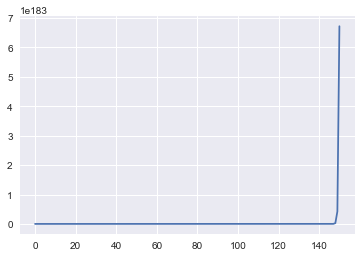

In [69]:
plt.plot(iteration,errors1)


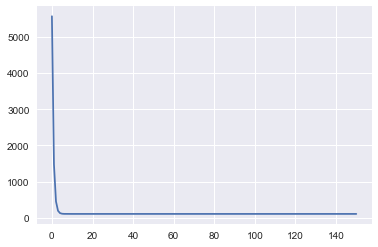

In [70]:
plt.plot(iteration,errors2)


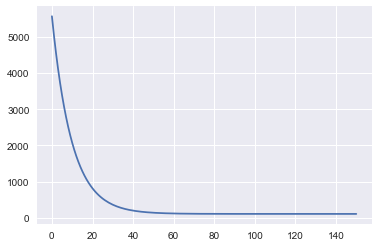

In [71]:
plt.plot(iteration,errors3)


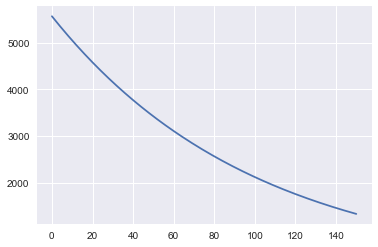

In [72]:
plt.plot(iteration,errors4)
